# EDA - Loan Data 

### Imports

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

### Reading each CSV in a separate dataframe

In [2]:
d1 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3a_securev1.csv', header=1, skipfooter=4, engine='python')
d2 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3b_securev1.csv', header=1, skipfooter=4, engine='python')
d3 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3c_securev1.csv', header=1, skipfooter=4, engine='python')
d4 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3d_securev1.csv', header=1, skipfooter=4, engine='python')
d5 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q1.csv', header=1, skipfooter=4, engine='python')
d6 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q2.csv', header=1, skipfooter=4, engine='python')
d7 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q3.csv', header=1, skipfooter=4, engine='python')
d8 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q4.csv', header=1, skipfooter=4, engine='python')
d9 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q1.csv', header=1, skipfooter=4, engine='python')
d10 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q2.csv', header=1, skipfooter=4, engine='python')
d11 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q3.csv', header=1, skipfooter=4, engine='python')

### Concatenating all the CSVs in one dataframe

In [73]:
loan_data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10,d11])

In [5]:
loan_data.shape

(1646773, 151)

### Finding the missing data percentage and storing columns in features with mores than 70% data

In [6]:
missing_data = loan_data.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/loan_data.shape[0])*100
missing_data.head()
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]
len(features)

93

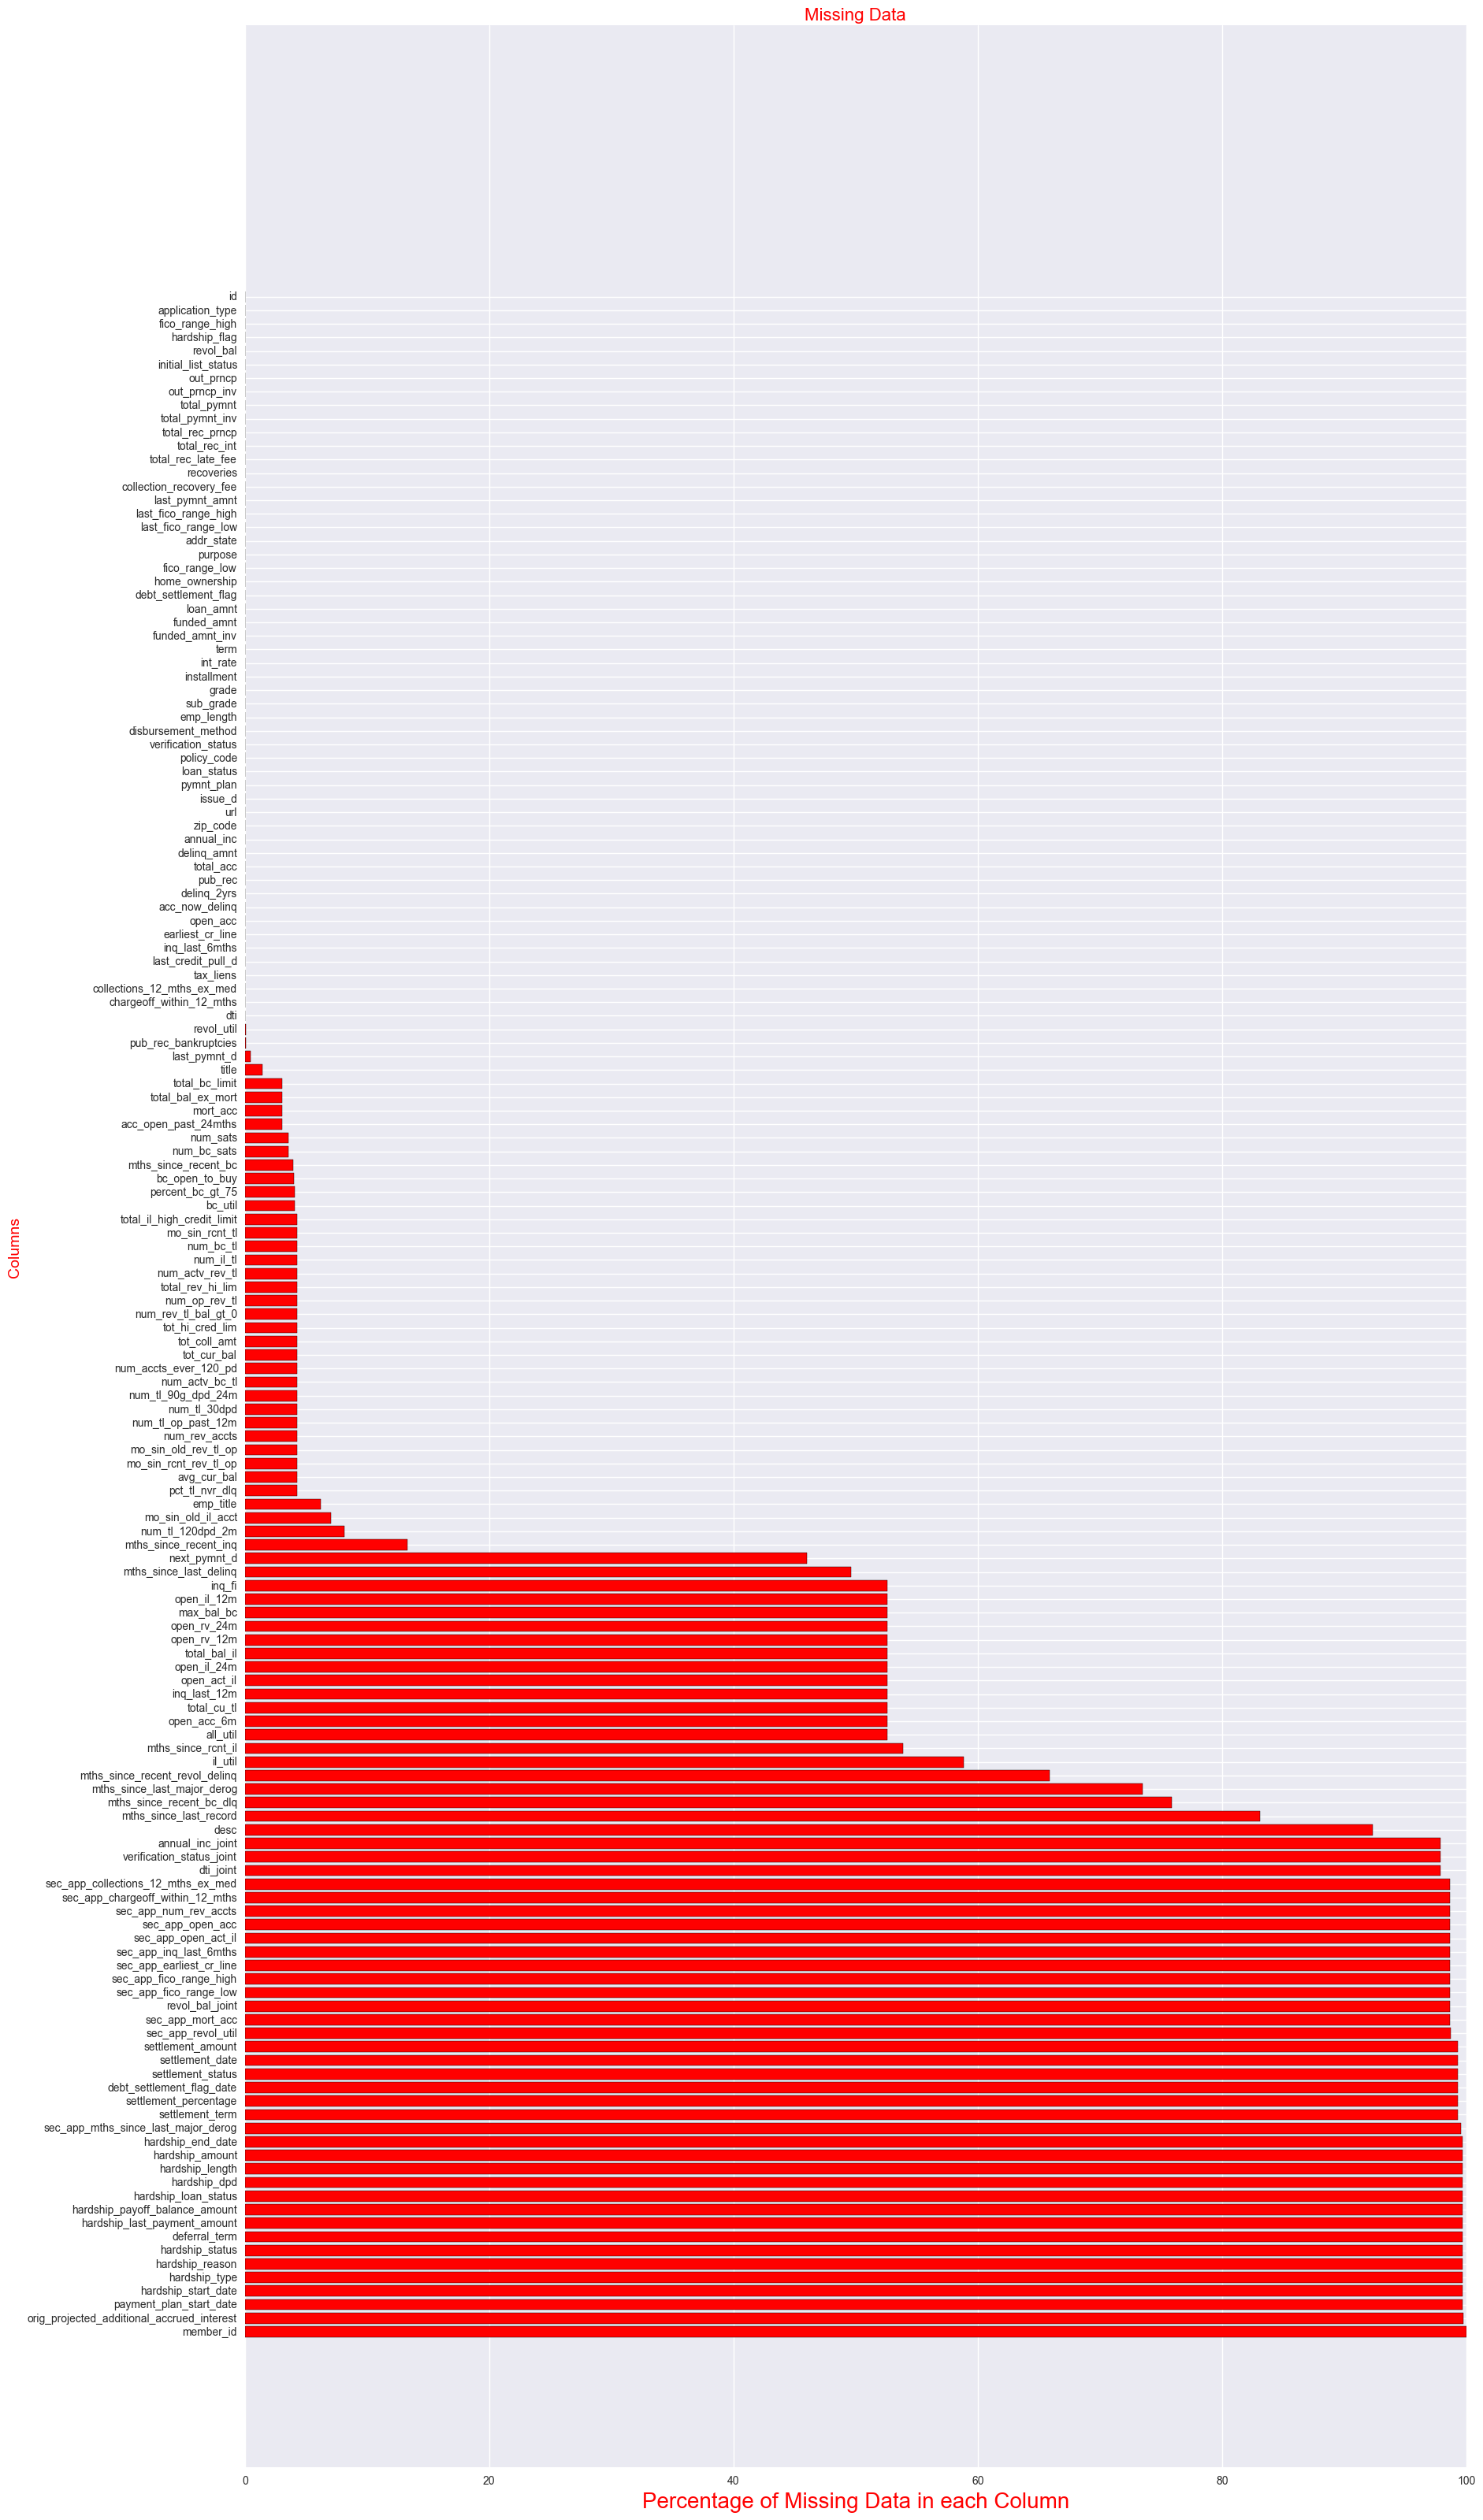

In [8]:
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(loan_data.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(loan_data.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

plt.show()

In [100]:
#del loan_data['id']
s = loan_data.reset_index()
s['index'] = s.index +1
s=s.rename(columns = {'index':'Id'})

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [159]:
f = ['Id','hardship_reason','application_type','fico_range_low','fico_range_high','emp_length','dti','annual_inc','dti_joint','annual_inc_joint','grade','sub_grade','int_rate','loan_amnt','issue_d','purpose','addr_state','zip_code']
df = s[f]
#df['Year'] = df['issue_d'].astype(str).map(lambda x: int(x.split('-')[1]))
df['Month'] = df['issue_d'].astype(str).map(lambda x: x.split('-')[0])

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Interest Rate

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


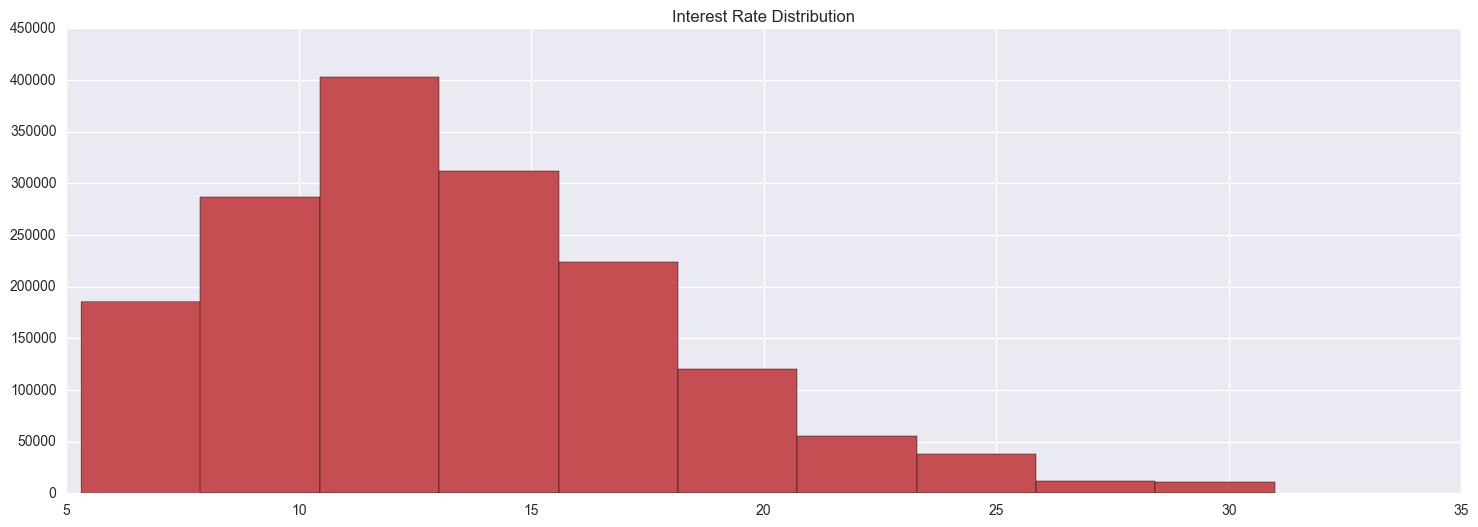

In [87]:
df['int_rate'] = df['int_rate'].astype(str).map(lambda x: x.rstrip('%'))
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')

plt.rc("figure", figsize=(18, 6))
df["int_rate"].hist()
plt.title("Interest Rate Distribution")
plt.show()

## Loan Amount distribution over the grade and subgrade

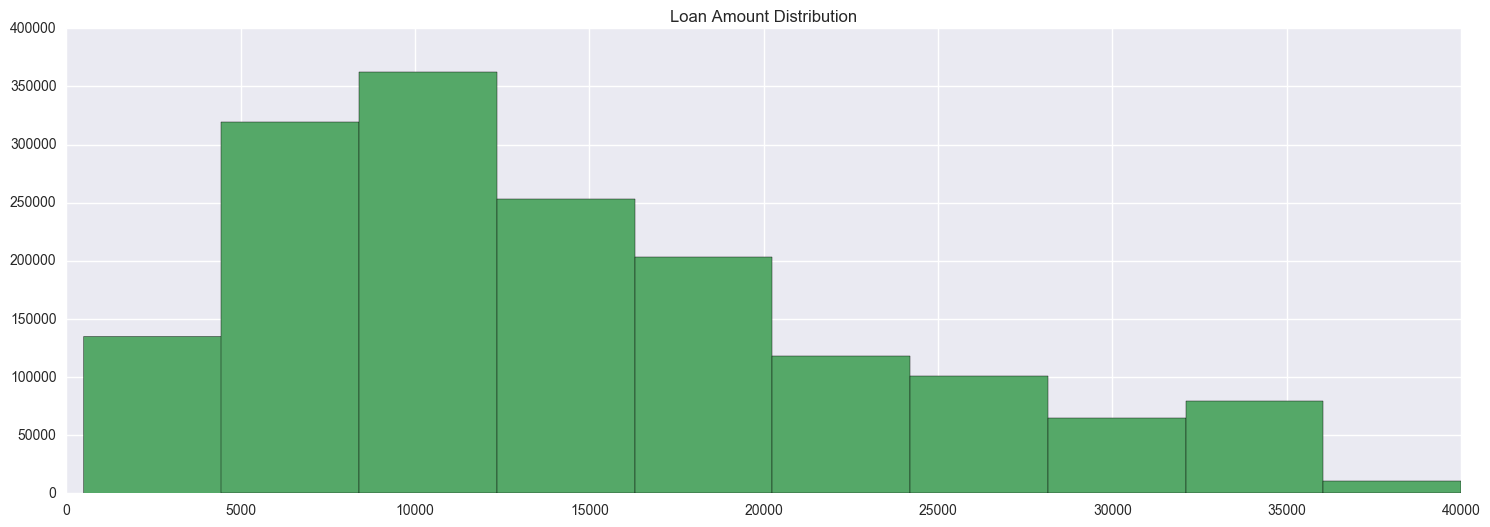

In [52]:
plt.rc("figure", figsize=(18, 6))
loan_data["loan_amnt"].hist()
plt.title("Loan Amount Distribution")
plt.show()

In [24]:
loan_data[['grade','loan_amnt']].groupby('grade').mean()

,loan_amnt
grade,
A,14030.661585
B,13515.775848
C,14708.894359
D,15665.895187
E,17841.710879
F,19096.324610
G,20340.413568


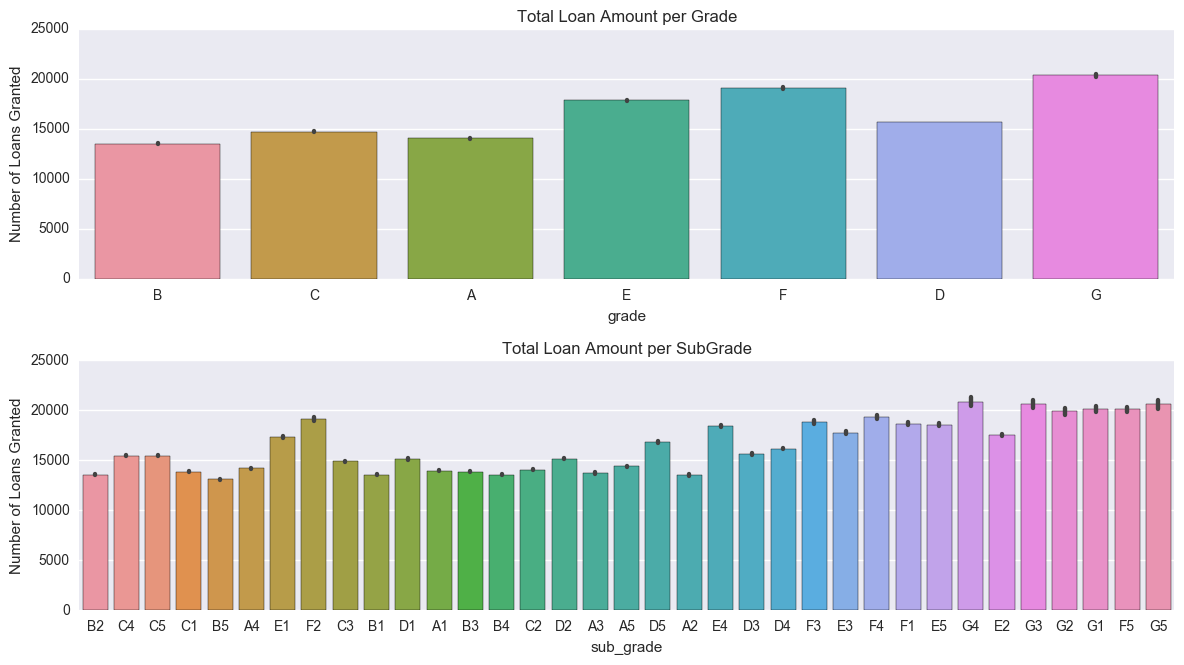

In [16]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 

ax1 = sns.barplot(x='grade', y='loan_amnt', data=loan_data,ax=axes1);
ax1.set(ylabel = 'Number of Loans Granted', title = 'Total Loan Amount per Grade')

ax2 = sns.barplot(x='sub_grade', y='loan_amnt', data=loan_data,ax=axes2);
ax2.set(ylabel = 'Number of Loans Granted', title = 'Total Loan Amount per SubGrade')

fig.tight_layout()
plt.show()

## Loan Amount per State

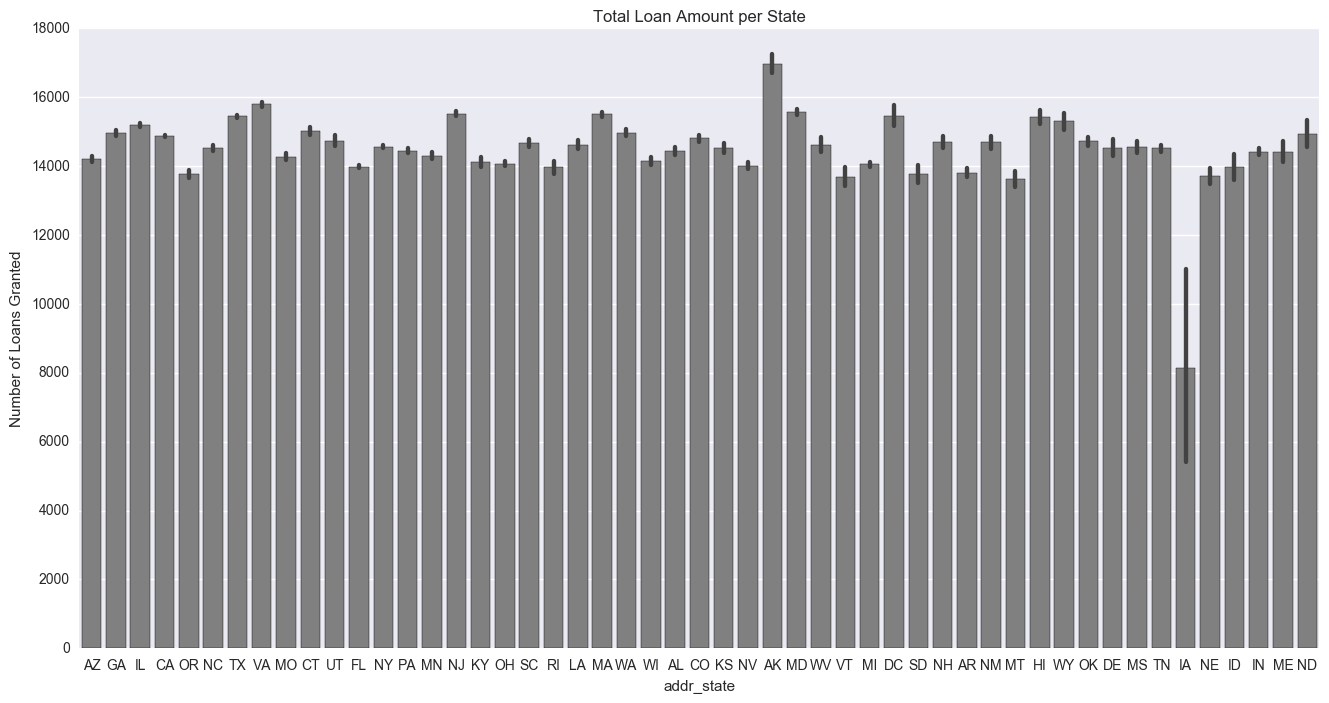

In [22]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='addr_state', y='loan_amnt', data=loan_data,color='Grey')
ax.set(ylabel = 'Number of Loans Granted', title = 'Total Loan Amount per State')
plt.show()

## Fico Range

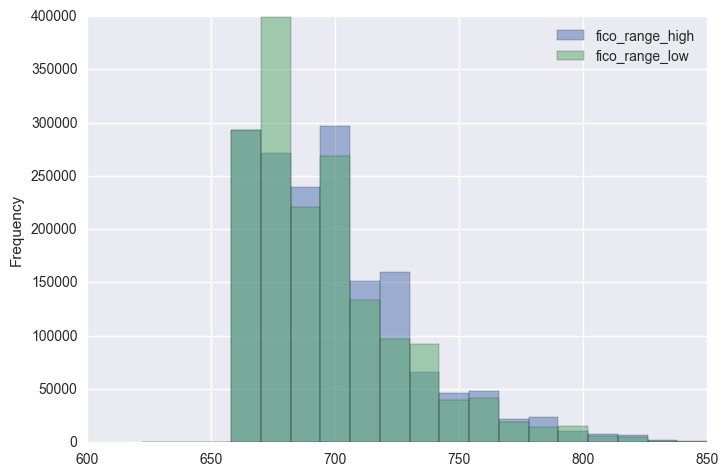

In [18]:
fico_columns = ['fico_range_high','fico_range_low']
loan_data[fico_columns].plot.hist(alpha=0.5,bins=20);
plt.show()

## Loan Status

In [36]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Default'], dtype=object)

In [37]:
loan_df.groupby('loan_status').size()

loan_status
Charged Off                                            154359
Current                                                721348
Default                                                   225
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             600680
In Grace Period                                         13970
Late (16-30 days)                                        6320
Late (31-120 days)                                      24426
dtype: int64

In [94]:
loan_data.groupby('loan_status')['loan_amnt'].describe().to_frame().T

loan_status Charged Off                                                     \
                  count          mean          std    min     25%      50%   
loan_amnt      154373.0  15370.616461  8591.103823  900.0  9000.0  14000.0   

loan_status                     Current                 ...     \
                 75%      max     count          mean   ...      
loan_amnt    20000.0  40000.0  838770.0  15072.552786   ...      

loan_status Late (16-30 days)          Late (31-120 days)                \
                          75%      max              count          mean   
loan_amnt             22500.0  40000.0            24782.0  15916.865063   

loan_status                                                           
                     std     min      25%      50%      75%      max  
loan_amnt    8944.527029  1000.0  9256.25  15000.0  21000.0  40000.0  

[1 rows x 80 columns]

In [ ]:
loan_data['loan_status']

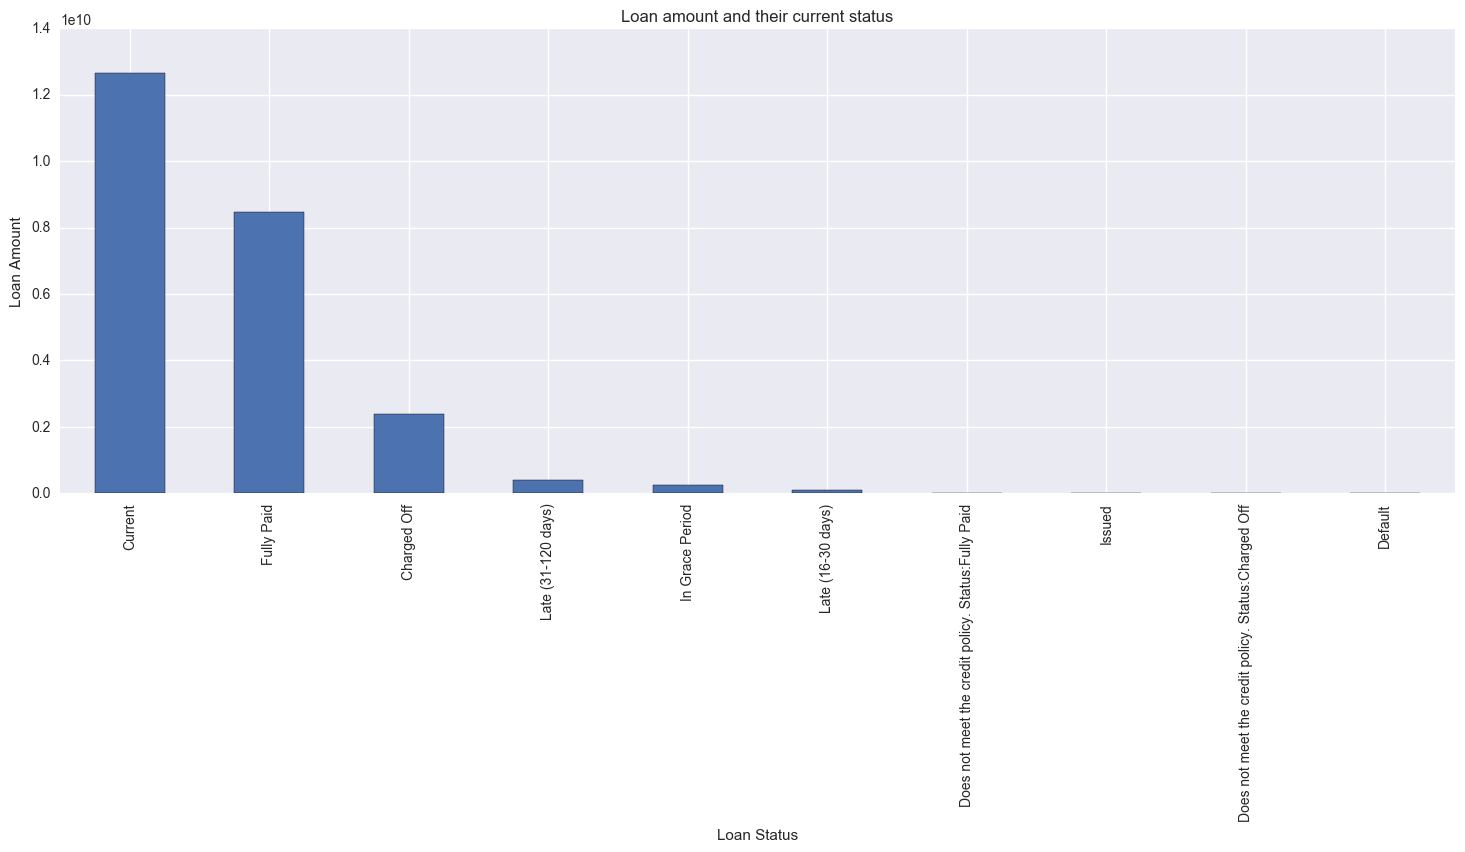

In [119]:
loan_data.groupby('loan_status')['loan_amnt'].sum().sort_values(ascending=0).plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan amount and their current status')
plt.show()

## DTI and DTI_Joint

In [171]:
# dticol = df[['dti','dti_joint','fico_range_high']].groupby('fico_range_high')
# dticol.plot.hist(alpha=0.5,bins=20);
# plt.show()

## Loan Purpose

In [46]:
loan_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [109]:
loan_data.groupby('purpose')['loan_amnt'].describe().to_frame().T

purpose        car                                                             \
             count         mean          std     min     25%     50%      75%   
loan_amnt  17641.0  9047.923871  6446.390998  1000.0  4800.0  7000.0  12000.0   

purpose            credit_card                 ...    vacation           \
               max       count          mean   ...         75%      max   
loan_amnt  40000.0    363960.0  15218.358611   ...      8000.0  40000.0   

purpose   wedding                                                              \
            count          mean          std     min     25%     50%      75%   
loan_amnt  2350.0  10479.095745  6754.309992  1000.0  5500.0  9000.0  14000.0   

purpose             
               max  
loan_amnt  35000.0  

[1 rows x 112 columns]

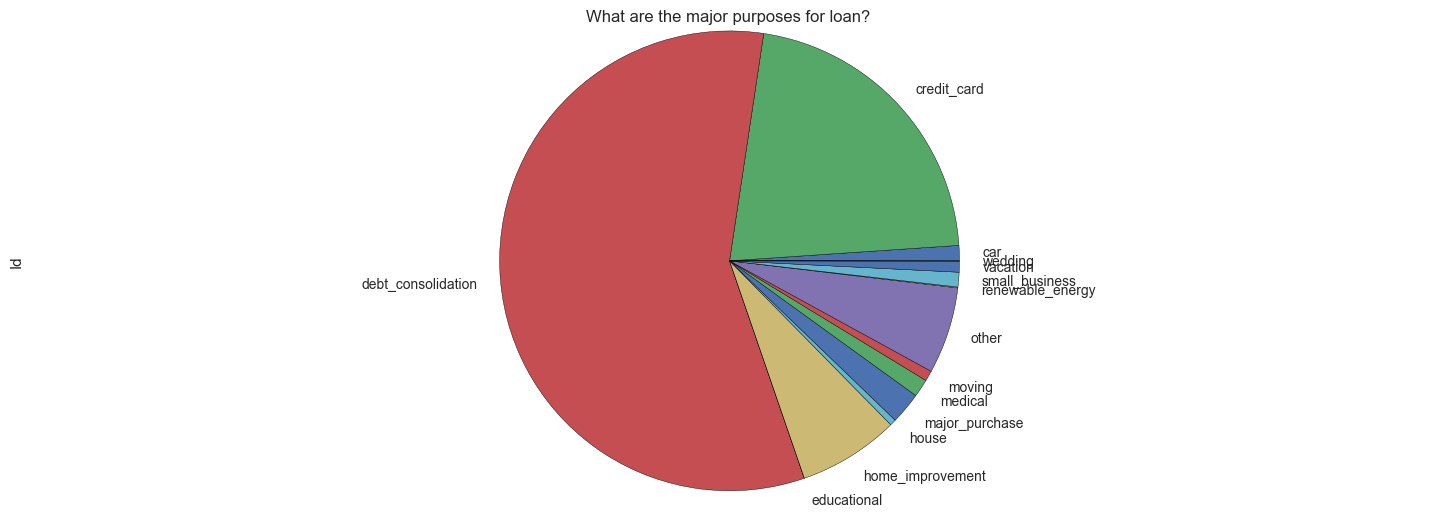

In [118]:
df.Id.groupby(df.purpose).sum().plot(kind='pie')
plt.axis('equal')
plt.title('What are the major purposes for loan?')
plt.show()

## Term

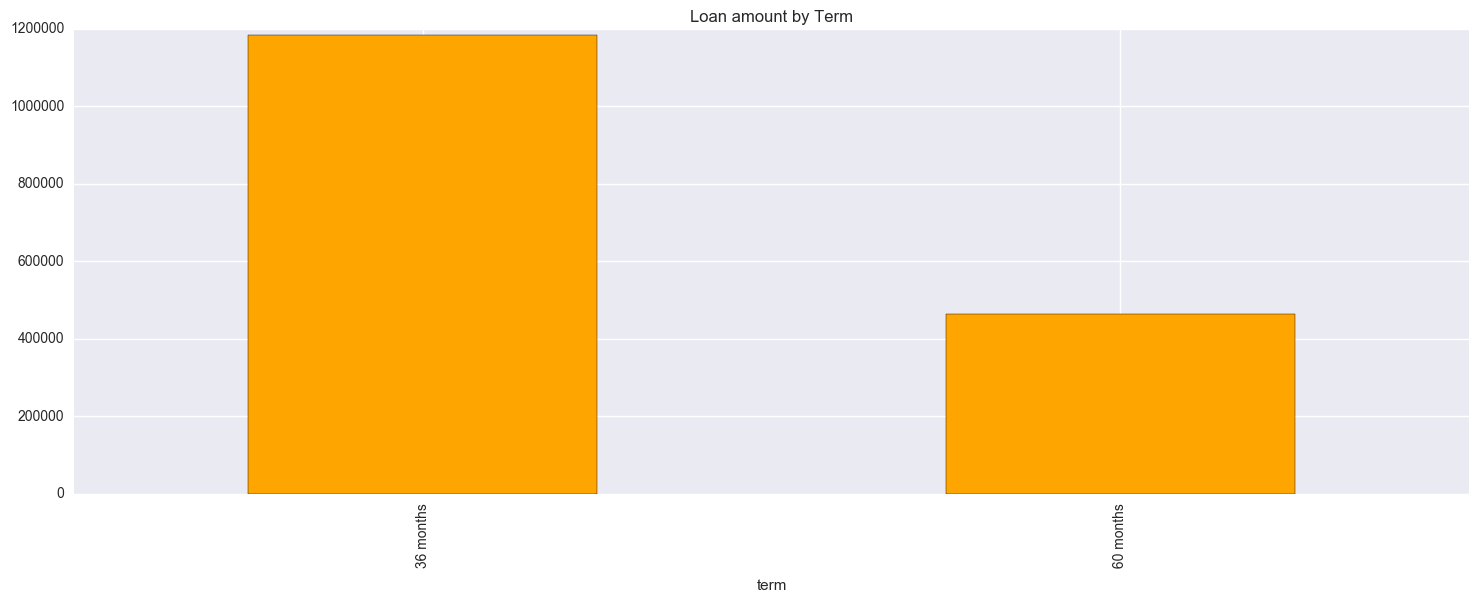

term
 36 months    1182403
 60 months     464369
Name: term, dtype: int64


In [134]:
term = loan_data.groupby('term')
term['term'].count().plot(kind='bar', color ='orange')
plt.title('Loan amount by Term')
plt.show()
print(term['term'].count())

## Application Type

In [136]:
loan_df.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

application_type
Individual    1612258
Joint App       34514
Name: application_type, dtype: int64


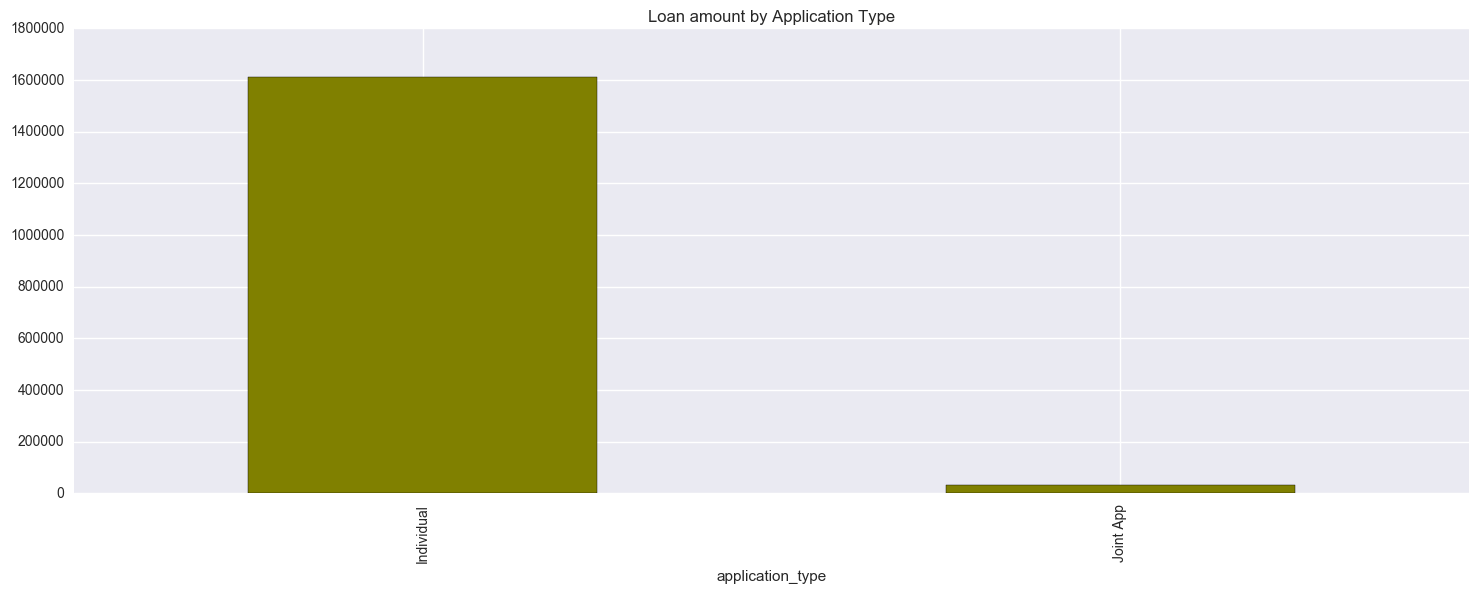

In [144]:
app = loan_data.groupby('application_type')
app['application_type'].count().plot(kind='bar', color ='olive')
plt.title('Loan amount by Application Type')
print(app['application_type'].count())
plt.show()

## Hardship

In [146]:
loan_data.groupby('hardship_reason')['loan_amnt'].count()

hardship_reason
DISABILITY                 58
DIVORCE                    88
EXCESSIVE_OBLIGATIONS     613
FAMILY_DEATH               68
INCOME_CURTAILMENT        370
MEDICAL                   389
NATURAL_DISASTER         2603
REDUCED_HOURS             212
UNEMPLOYMENT              583
Name: loan_amnt, dtype: int64

In [ ]:
df.Id.groupby(df.purpose).sum().plot(kind='pie')
plt.axis('equal')
plt.title('What are the major purposes for loan?')
plt.show()

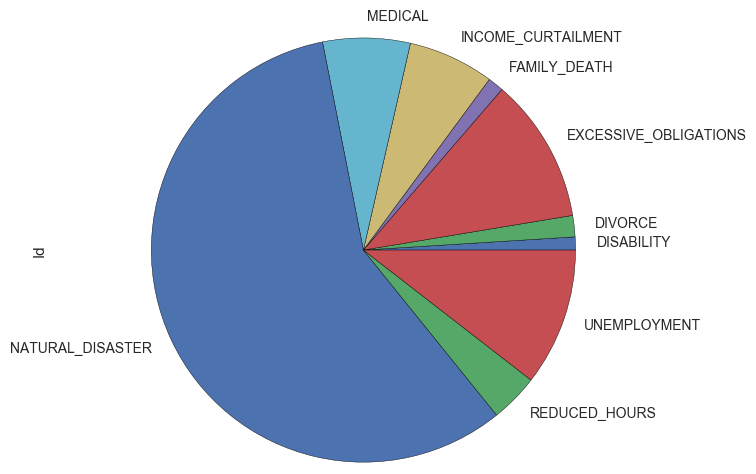

In [162]:
df.Id.groupby(df.hardship_reason).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

## Employment Length

In [156]:
df['emp_length']=np.where(df['emp_length']=='10+ years','10',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='< 1 year','0',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='1 year','1',df['emp_length'])

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

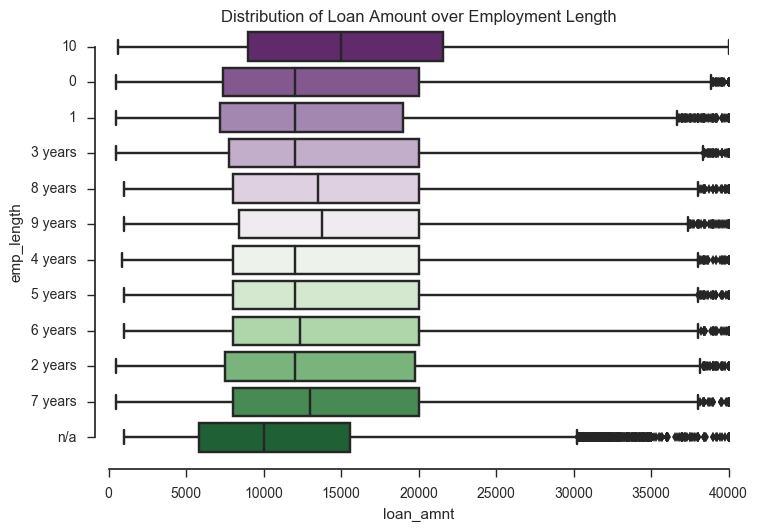

In [157]:
import seaborn as sns
sns.set(style="ticks")
plt.title('Distribution of Loan Amount over Employment Length')
sns.boxplot(x="loan_amnt", y="emp_length", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

## Heat Map of columns details provided during application for Loan

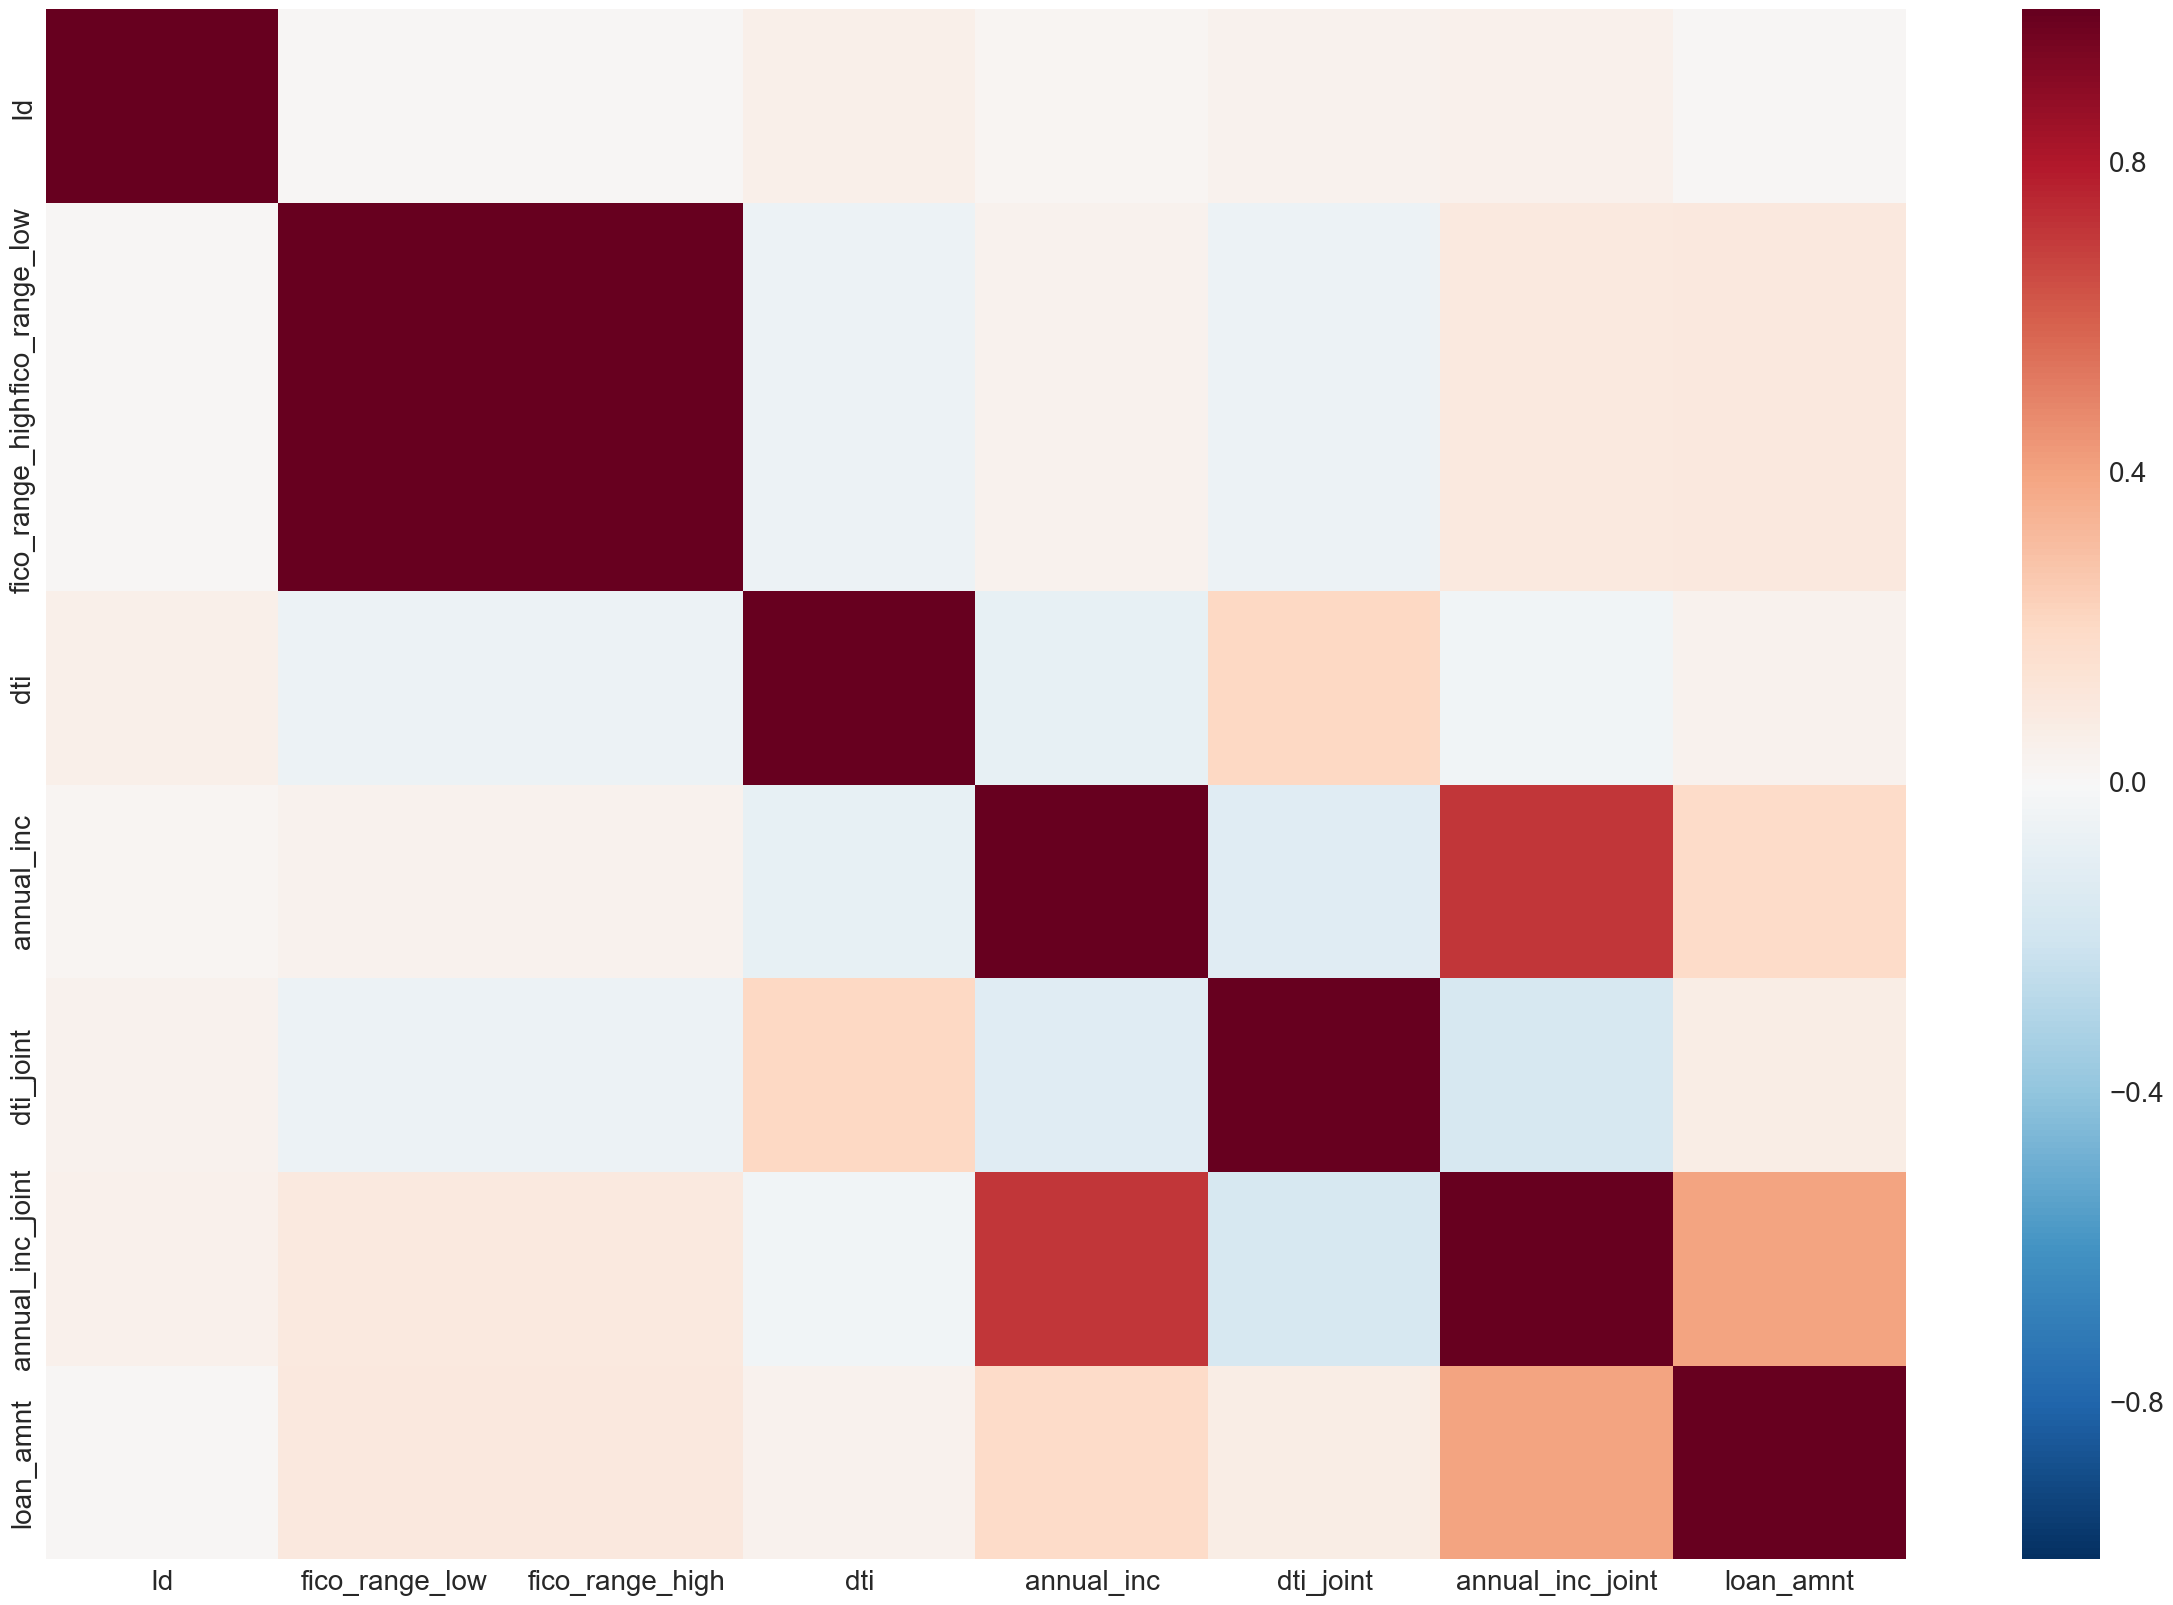

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()